# [과제 3] 로지스틱 회귀분석
### - sklearn 패키지를 사용해 로지스틱 회귀분석을 진행해주세요.
### - 성능지표를 계산하고 이에 대해 해석해주세요.
### - 성능 개선을 시도해주세요. (어떠한 성능지표를 기준으로 개선을 시도했는지, 그 이유도 함께 적어주세요.)
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

## Data 

출처 : https://www.kaggle.com/mlg-ulb/creditcardfraud


* V1 ~ V28 : 비식별화 된 개인정보 
* **Class** : Target 변수  
  - 1 : fraudulent transactions (사기)
  - 0 : otherwise 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
data = pd.read_csv("assignment3_creditcard.csv")

In [3]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.848212,2.384900,0.379573,1.048381,-0.845070,2.537837,-4.542983,-10.201458,-1.504967,-2.234167,...,2.585817,-5.291690,0.859364,0.423231,-0.506985,1.020052,-0.627751,-0.017753,0.280982,0
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,...,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.979686,-0.093244,-0.065615,0
2,-2.985294,-2.747472,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.806488,...,1.345776,0.373760,-0.385777,1.197596,0.407229,0.008013,0.762362,-0.299024,-0.303929,0
3,-1.479452,1.542874,0.290895,0.838142,-0.529290,-0.717661,0.484516,0.545092,-0.780767,0.324804,...,0.038397,0.116771,0.405560,-0.116453,0.541275,-0.216665,-0.415578,0.027126,-0.150347,0
4,-0.281976,-0.309699,-2.162299,-0.851514,0.106167,-1.483888,1.930994,-0.843049,-1.249272,1.079608,...,-0.875516,-0.004199,1.015108,-0.026748,0.077115,-1.468822,0.751700,0.496732,0.331001,0


In [4]:
# 데이터 속성 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28678 entries, 0 to 28677
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      28678 non-null  float64
 1   V2      28678 non-null  float64
 2   V3      28678 non-null  float64
 3   V4      28678 non-null  float64
 4   V5      28678 non-null  float64
 5   V6      28678 non-null  float64
 6   V7      28678 non-null  float64
 7   V8      28678 non-null  float64
 8   V9      28678 non-null  float64
 9   V10     28678 non-null  float64
 10  V11     28678 non-null  float64
 11  V12     28678 non-null  float64
 12  V13     28678 non-null  float64
 13  V14     28678 non-null  float64
 14  V15     28678 non-null  float64
 15  V16     28678 non-null  float64
 16  V17     28678 non-null  float64
 17  V18     28678 non-null  float64
 18  V19     28678 non-null  float64
 19  V20     28678 non-null  float64
 20  V21     28678 non-null  float64
 21  V22     28678 non-null  float64
 22

In [5]:
# 범주형 변수 처리
data["Class"] = pd.Series(data["Class"], dtype = "category")

In [6]:
# 기초통계량 확인
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,...,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000
mean,-0.015438,0.053653,-0.046031,0.037348,-0.033724,-0.003299,-0.051054,0.006064,-0.018530,-0.041149,...,0.007183,0.002633,0.010289,-0.000656,-0.004800,-0.000897,-0.001989,-0.000765,0.000948,0.001535
std,2.031529,1.616186,1.758169,1.482109,1.486998,1.339259,1.454827,1.364342,1.134065,1.252593,...,0.827420,0.720307,0.847152,0.739469,0.593663,0.603349,0.517968,0.483852,0.397075,0.296736
min,-30.552380,-42.172688,-31.103685,-5.560118,-42.147898,-21.929312,-41.506796,-39.267378,-13.434066,-24.403185,...,-4.619034,-21.387122,-21.453736,-8.887017,-36.666000,-2.718024,-6.712624,-2.241620,-7.418878,-9.617915
25%,-0.916927,-0.575381,-0.899872,-0.843321,-0.714901,-0.763757,-0.568146,-0.206103,-0.661909,-0.543450,...,-0.459073,-0.209678,-0.225520,-0.539244,-0.160583,-0.356047,-0.318619,-0.327343,-0.070558,-0.052189
50%,0.020050,0.075358,0.180610,-0.008844,-0.060040,-0.271363,0.036107,0.022463,-0.055095,-0.097390,...,0.002111,-0.062792,-0.028778,0.007302,-0.011199,0.040006,0.019770,-0.056260,0.002049,0.011075
75%,1.317461,0.806957,1.029928,0.771958,0.613328,0.397269,0.559409,0.329606,0.605704,0.460681,...,0.467781,0.131199,0.184312,0.526358,0.146835,0.437146,0.352717,0.240713,0.091637,0.078911
max,2.399484,21.467203,4.069865,11.927512,32.911462,22.529298,36.677268,20.007208,8.113152,15.236028,...,5.228342,26.237391,27.202839,8.361985,9.637187,3.948061,2.510401,3.122747,11.135740,14.929133


In [7]:
# 데이터 분리
y = data['Class']
X = data.iloc[:,:-1]

In [8]:
# 데이터 분포 확인
# 0이 1보다 압도적으로 많은 것으로 보아 불균형 데이터임을 알 수 있음
# 해당 경우에는 F1 score를 통하여 비교하는 것이 합리적
y.value_counts()

0    28432
1      246
Name: Class, dtype: int64

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

# train, test 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [10]:
# train, test shape 확인
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(22942, 28) (5736, 28) (22942,) (5736,)


In [11]:
# Logistic Regression 모델 적합
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)

In [43]:
print('Accuracy :{0:0.5f}'.format(accuracy_score(y_test , y_pred))) 
print('AUC : {0:0.5f}'.format(roc_auc_score(y_test , y_pred)))
print('Precision : {0:0.5f}'.format(precision_score(y_test , y_pred)))
print('Recall : {0:0.5f}'.format(recall_score(y_test , y_pred)))
print('F1 : {0:0.5f}'.format(f1_score(y_test , y_pred)))

Accuracy :0.99791
AUC : 0.88767
Precision : 0.97436
Recall : 0.77551
F1 : 0.86364


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5687
           1       0.97      0.78      0.86        49

    accuracy                           1.00      5736
   macro avg       0.99      0.89      0.93      5736
weighted avg       1.00      1.00      1.00      5736



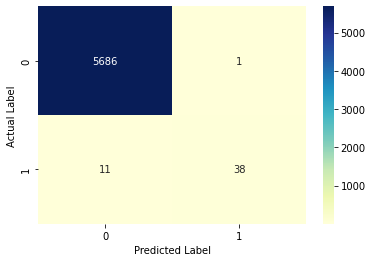

In [12]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

print(classification_report(y_test, y_pred))

Text(0.5, 1.0, 'Precision Recall Curve')

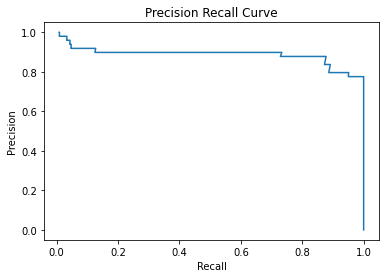

In [13]:
y_pred_prob = model.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')

### 불균형 데이터의 성능을 향상시키기 위하여 오버샘플링을 진행(SMOTE)

Transaction Number x_train dataset:  (22942, 28)
Transaction Number y_train dataset:  (22942,)
Transaction Number x_test dataset:  (5736, 28)
Transaction Number y_test dataset:  (5736,)
Before OverSampling, counts of label '1': 197
Before OverSampling, counts of label '0': 22745 

After OverSampling, the shape of train_x: (45490, 28)
After OverSampling, the shape of train_y: (45490,) 

After OverSampling, counts of label '1', %: 50.0
After OverSampling, counts of label '0', %: 50.0


<AxesSubplot:ylabel='count'>

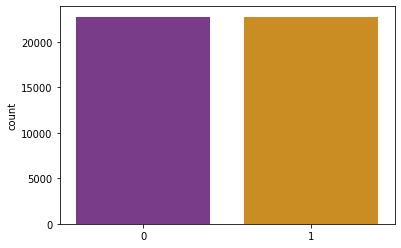

In [15]:
from imblearn.over_sampling import SMOTE

print("Transaction Number x_train dataset: ", X_train.shape)
print("Transaction Number y_train dataset: ", y_train.shape)
print("Transaction Number x_test dataset: ", X_test.shape)
print("Transaction Number y_test dataset: ", y_test.shape)

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=42)
X_train_s, y_train_s = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_x: {}'.format(X_train_s.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_s.shape))

print("After OverSampling, counts of label '1', %: {}".format(sum(y_train_s==1)/len(y_train_s)*100.0,2))
print("After OverSampling, counts of label '0', %: {}".format(sum(y_train_s==0)/len(y_train_s)*100.0,2))

sns.countplot(x=y_train_s, data=data, palette='CMRmap')

In [18]:
model = LogisticRegression()
model.fit(X_train_s, y_train_s)
y_pred = model.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      5687
           1       0.24      0.90      0.37        49

    accuracy                           0.97      5736
   macro avg       0.62      0.94      0.68      5736
weighted avg       0.99      0.97      0.98      5736



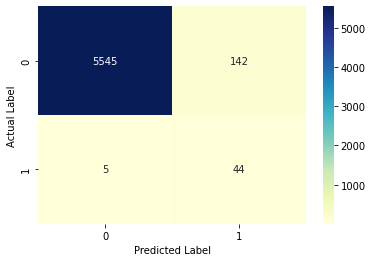

In [19]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

print(classification_report(y_test, y_pred))

Text(0.5, 1.0, 'Precision Recall Curve')

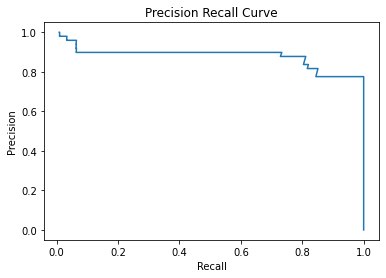

In [20]:
y_pred_prob = model.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')

### 불균형 데이터의 성능을 향상시키기 위하여 오버샘플링을 진행(Random Over Sampling)

In [33]:
from collections import Counter 

print('Original dataset shape %s' % Counter(y_train))

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_smote))

Original dataset shape Counter({0: 22745, 1: 197})
Resampled dataset shape Counter({0: 22745, 1: 22745})


In [34]:
# SMOTE Sampling with Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_smote, y_train_smote)

y_pred_smote = logreg.predict(X_test)

In [36]:
print('Accuracy :{0:0.5f}'.format(accuracy_score(y_test , y_pred_smote))) 
print('AUC : {0:0.5f}'.format(roc_auc_score(y_test , y_pred_smote)))
print('Precision : {0:0.5f}'.format(precision_score(y_test , y_pred_smote)))
print('Recall : {0:0.5f}'.format(recall_score(y_test , y_pred_smote)))
print('F1 : {0:0.5f}'.format(f1_score(y_test , y_pred_smote)))

Accuracy :0.97437
AUC : 0.93649
Precision : 0.23656
Recall : 0.89796
F1 : 0.37447


In [22]:
from collections import Counter 
from imblearn.over_sampling import RandomOverSampler

print('Original dataset shape %s' % Counter(y_train))

ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_ros))

Original dataset shape Counter({0: 22745, 1: 197})
Resampled dataset shape Counter({0: 22745, 1: 22745})


In [23]:
# Oversampling with Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_ros, y_train_ros)

y_pred_ros = logreg.predict(X_test)

In [25]:
print('Accuracy :{0:0.5f}'.format(accuracy_score(y_test , y_pred_ros))) 
print('AUC : {0:0.5f}'.format(roc_auc_score(y_test , y_pred_ros)))
print('Precision : {0:0.5f}'.format(precision_score(y_test , y_pred_ros)))
print('Recall : {0:0.5f}'.format(recall_score(y_test , y_pred_ros)))
print('F1 : {0:0.5f}'.format(f1_score(y_test , y_pred_ros)))

Accuracy :0.97943
AUC : 0.93904
Precision : 0.28025
Recall : 0.89796
F1 : 0.42718


### 불균형 데이터의 성능을 향상시키기 위하여 오버샘플링을 진행(ADASYN)

In [26]:
from imblearn.over_sampling import ADASYN

print('Original dataset shape %s' % Counter(y_train))

adasyn = ADASYN(random_state=42)

X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train_adasyn))

Original dataset shape Counter({0: 22745, 1: 197})
Resampled dataset shape Counter({1: 22766, 0: 22745})


In [27]:
#  ADASYN Sampling with Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_adasyn, y_train_adasyn)

y_pred_adasyn = logreg.predict(X_test)

In [29]:
print('Accuracy :{0:0.5f}'.format(accuracy_score(y_pred , y_pred_adasyn))) 
print('AUC : {0:0.5f}'.format(roc_auc_score(y_test , y_pred_adasyn)))
print('Precision : {0:0.5f}'.format(precision_score(y_test , y_pred_adasyn)))
print('Recall : {0:0.5f}'.format(recall_score(y_test , y_pred_adasyn)))
print('F1 : {0:0.5f}'.format(f1_score(y_test , y_pred_adasyn)))

Accuracy :0.92556
AUC : 0.90960
Precision : 0.07389
Recall : 0.91837
F1 : 0.13678


### cutoff 변경

- 기본

In [12]:
# Logistic Regression 모델 적합
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)

In [13]:
beta = np.concatenate([model.intercept_, model.coef_.reshape(-1)]).round(2)
Xbeta = np.matmul(np.c_[np.ones(X_test.shape[0]), X_test], beta.reshape(-1,1))
p1 = 1 / (1 + np.exp(-Xbeta))

cutoff = [0.5]

for cut in cutoff:
    y_pred = np.where(p1.reshape(-1) >= cut, 1, 0)

    tn, fn, fp, tp = confusion_matrix(y_pred, y_test).reshape(-1)
    p = fn + tp
    n = tn + fp

    print("cutoff :", str(cut))

    f1 = f1_score(y_pred, y_test)
    print("f1 : ", f1)

cutoff : 0.5
f1 :  0.8636363636363635


In [14]:
cutoff = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for cut in cutoff:
    y_pred = np.where(p1.reshape(-1) >= cut, 1, 0)

    tn, fn, fp, tp = confusion_matrix(y_pred, y_test).reshape(-1)
    p = fn + tp
    n = tn + fp

    print("cutoff :", str(cut))

    f1 = f1_score(y_pred, y_test)
    print("f1 : ", f1)
    print()

cutoff : 0.1
f1 :  0.8421052631578948

cutoff : 0.2
f1 :  0.8636363636363635

cutoff : 0.3
f1 :  0.8636363636363635

cutoff : 0.4
f1 :  0.8636363636363635

cutoff : 0.5
f1 :  0.8636363636363635

cutoff : 0.6
f1 :  0.8636363636363635

cutoff : 0.7
f1 :  0.8604651162790697

cutoff : 0.8
f1 :  0.8333333333333333

cutoff : 0.9
f1 :  0.7901234567901235



In [15]:
cutoff = [0.1, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19]

for cut in cutoff:
    y_pred = np.where(p1.reshape(-1) >= cut, 1, 0)

    tn, fn, fp, tp = confusion_matrix(y_pred, y_test).reshape(-1)
    p = fn + tp
    n = tn + fp

    print("cutoff :", str(cut))

    f1 = f1_score(y_pred, y_test)
    print("f1 : ", f1)
    print()

cutoff : 0.1
f1 :  0.8421052631578948

cutoff : 0.12
f1 :  0.8387096774193548

cutoff : 0.13
f1 :  0.8478260869565216

cutoff : 0.14
f1 :  0.8571428571428572

cutoff : 0.15
f1 :  0.8666666666666666

cutoff : 0.16
f1 :  0.8666666666666666

cutoff : 0.17
f1 :  0.8539325842696629

cutoff : 0.18
f1 :  0.8636363636363635

cutoff : 0.19
f1 :  0.8636363636363635



- cutoff를 기존 0.5에서 0.15 또는 0.16으로 수정시에 f1_score가 약간 오르는 것을 확인할 수 있음

In [18]:
from collections import Counter 
from imblearn.over_sampling import SMOTE

print('Original dataset shape %s' % Counter(y_train))

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_smote))

Original dataset shape Counter({0: 22745, 1: 197})
Resampled dataset shape Counter({0: 22745, 1: 22745})


In [19]:
# SMOTE Sampling with Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_smote, y_train_smote)

y_pred_smote = logreg.predict(X_test)

In [20]:
beta = np.concatenate([logreg.intercept_, logreg.coef_.reshape(-1)]).round(2)
Xbeta = np.matmul(np.c_[np.ones(X_test.shape[0]), X_test], beta.reshape(-1,1))
p1 = 1 / (1 + np.exp(-Xbeta))

cutoff = [0.5]

for cut in cutoff:
    y_pred = np.where(p1.reshape(-1) >= cut, 1, 0)

    tn, fn, fp, tp = confusion_matrix(y_pred, y_test).reshape(-1)
    p = fn + tp
    n = tn + fp

    print("cutoff :", str(cut))

    f1 = f1_score(y_pred, y_test)
    print("f1 : ", f1)

cutoff : 0.5
f1 :  0.3728813559322034


In [21]:
cutoff = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for cut in cutoff:
    y_pred = np.where(p1.reshape(-1) >= cut, 1, 0)

    tn, fn, fp, tp = confusion_matrix(y_pred, y_test).reshape(-1)
    p = fn + tp
    n = tn + fp

    print("cutoff :", str(cut))

    f1 = f1_score(y_pred, y_test)
    print("f1 : ", f1)
    print()

cutoff : 0.1
f1 :  0.08491418247515808

cutoff : 0.2
f1 :  0.14332247557003255

cutoff : 0.3
f1 :  0.21359223300970873

cutoff : 0.4
f1 :  0.29235880398671094

cutoff : 0.5
f1 :  0.3728813559322034

cutoff : 0.6
f1 :  0.4583333333333334

cutoff : 0.7
f1 :  0.5641025641025641

cutoff : 0.8
f1 :  0.6717557251908397

cutoff : 0.9
f1 :  0.819047619047619



In [24]:
cutoff = [0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]

for cut in cutoff:
    y_pred = np.where(p1.reshape(-1) >= cut, 1, 0)

    tn, fn, fp, tp = confusion_matrix(y_pred, y_test).reshape(-1)
    p = fn + tp
    n = tn + fp

    print("cutoff :", str(cut))

    f1 = f1_score(y_pred, y_test)
    print("f1 : ", f1)
    print()

cutoff : 0.91
f1 :  0.8235294117647058

cutoff : 0.92
f1 :  0.8200000000000001

cutoff : 0.93
f1 :  0.8282828282828283

cutoff : 0.94
f1 :  0.8282828282828283

cutoff : 0.95
f1 :  0.8282828282828283

cutoff : 0.96
f1 :  0.8282828282828283

cutoff : 0.97
f1 :  0.8247422680412372

cutoff : 0.98
f1 :  0.8247422680412372

cutoff : 0.99
f1 :  0.8172043010752688



- Over Sampling을 진행하지 않고 cutoff만 변경했을 때, 성능이 약간 오르는 것을 확인할 수 있음